## Amazon Sales Report

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [37]:
# loading a csv file
df = pd.read_csv('Amazon Sale Report.csv',encoding =  'unicode_escape') 

In [38]:
# determining no of rows & no of columns
df.shape 

(128976, 21)

In [39]:
# fetching top 5 records
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [41]:
# dropping blank columns
df.drop(['New', 'PendingS'], axis = 1,inplace = True)

In [42]:
# counting null values
df.isnull().sum() 

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [43]:
# dropping null values
df.dropna(inplace = True)

In [44]:
df.isnull().sum() 

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [45]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [46]:
# changing the datatype
df['ship-postal-code'] = df['ship-postal-code'].astype('int')

In [47]:
# checking the datatype if it is changed or not
df['ship-postal-code'].dtype

dtype('int64')

In [48]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\ramdu\AppData\Local\Temp\ipykernel_5984\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [49]:
# changing column name 
df.rename(columns = {'Qty' : 'Quantity', 'currency': 'Currency'}, inplace = True)

In [50]:
df.describe()

,index,Date,Quantity,Amount,ship-postal-code
count,37514.000000,37514,37514.000000,37514.000000,37514.000000
mean,60953.809858,2022-05-11 07:56:47.303939840,0.867383,646.553960,463291.552754
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,27235.250000,2022-04-20 00:00:00,1.000000,458.000000,370465.000000
50%,63470.500000,2022-05-09 00:00:00,1.000000,629.000000,500019.000000
75%,91790.750000,2022-06-01 00:00:00,1.000000,771.000000,600042.000000
max,128891.000000,2022-06-29 00:00:00,5.000000,5495.000000,989898.000000
std,36844.853039,NaN,0.354160,279.952414,194550.425637


In [51]:
df.describe(include = "object")

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


In [52]:
df[['Quantity','Amount']].describe()

,Quantity,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


## Exploratary Data Analysis

## Size Distribution

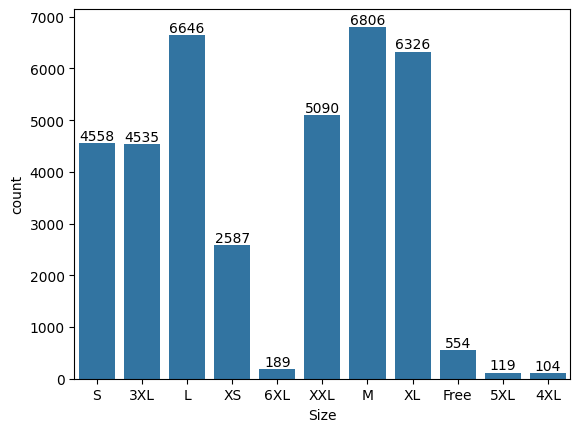

In [53]:
ax = sns.countplot(x = 'Size', data = df)
ax.bar_label(ax.containers[0])
plt.show()

##### From the above graph we can conclude that most of the people likes to buy M-Size

## Group by 

In [54]:
gp = df.groupby(['Size'],as_index = False)['Quantity'].sum().sort_values(by = 'Quantity', ascending = False)
#print(gp)

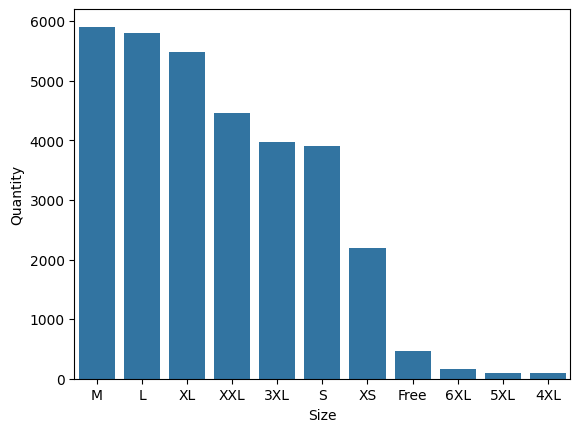

In [55]:
gp = df.groupby(['Size'],as_index = False)['Quantity'].sum().sort_values(by = 'Quantity', ascending = False)
sns.barplot(x = 'Size', y = 'Quantity', data = gp)
plt.show()

##### From the above chart we can conclude that People likes to buy M-Size

## Courier Status

In [56]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'Currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

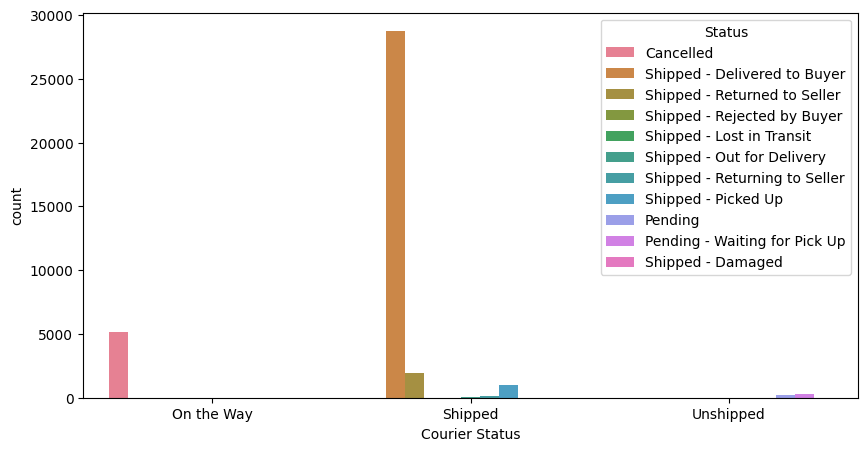

In [57]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "Courier Status", hue = "Status")
plt.show()

##### From the above graph the majority of the orders are Shipped through the courier

## Categeory Wise Distribution

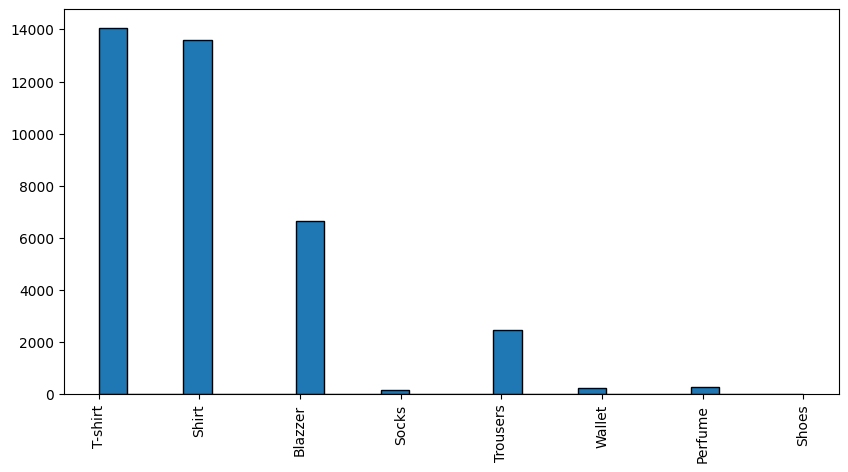

In [58]:
df['Category'] = df['Category'].astype('str')
column_data = df['Category']
plt.figure(figsize = (10,5))
plt.hist(column_data, bins = 25, edgecolor = "black")
plt.xticks(rotation = 90)
plt.show()

##### From the above graph we can say that most of the people likely to buy T-Shirts

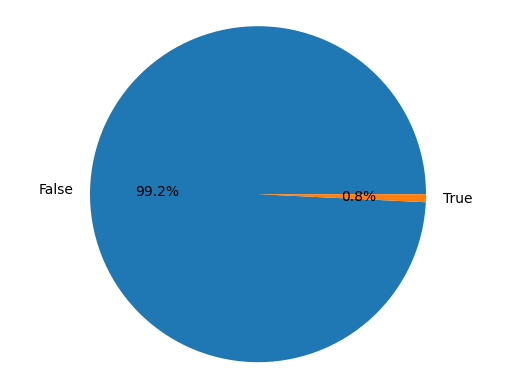

In [61]:
# Checking B2B Data  by using pie chart 
B2B_Check = df['B2B'].value_counts()
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

##### From above chart  we can see that maximum i.e. 99.2% of buyers are retailers and 0.8% are B2B buyers

## Distribution in States

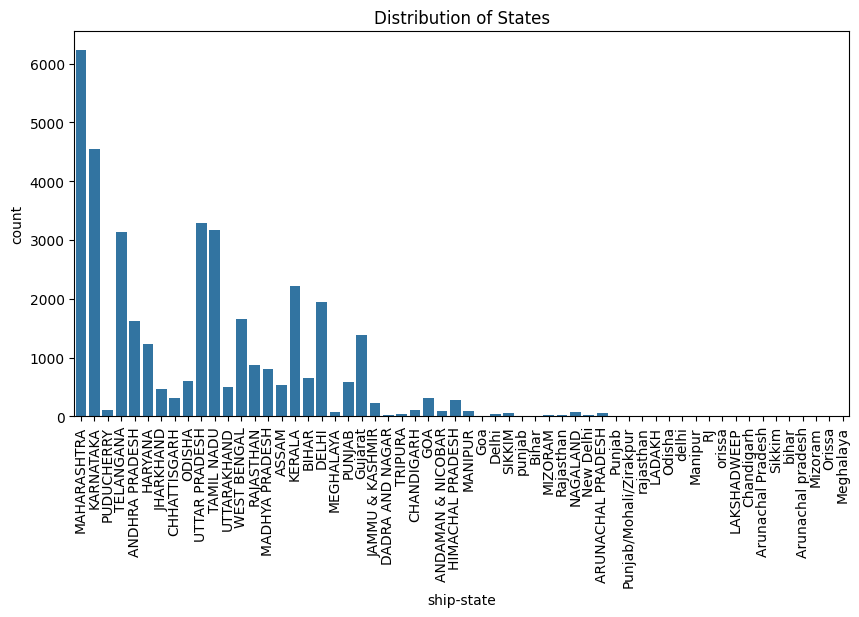

In [91]:
plt.figure(figsize = (10,5))
sns.countplot(x= 'ship-state',data = df)
plt.xticks(rotation = 90)
plt.title("Distribution of States")
plt.xlabel("ship-state")
plt.ylabel("count")
plt.show()

## Top 10 States

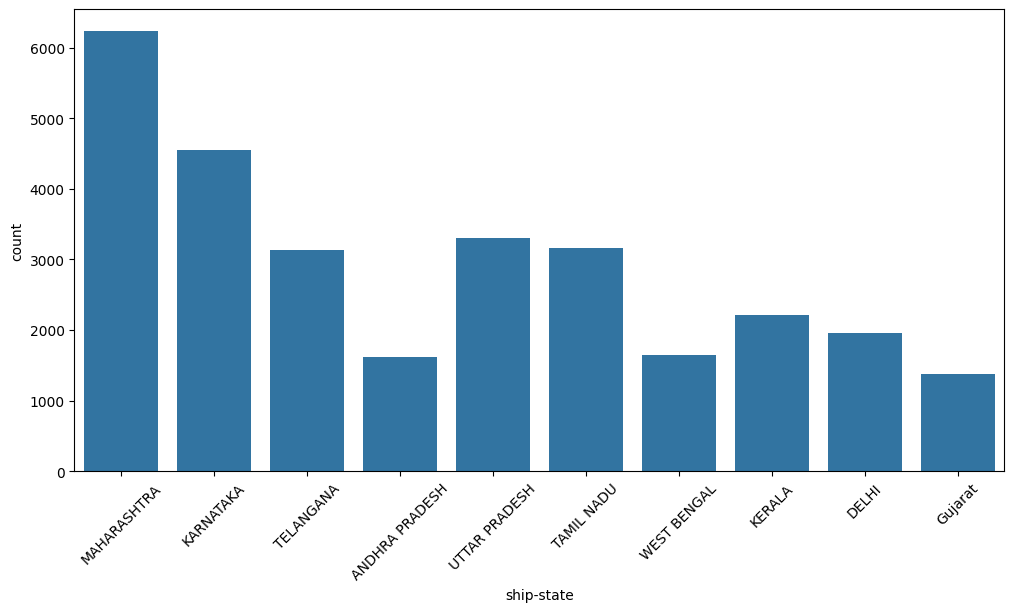

In [92]:
top_10_states = df['ship-state'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.countplot(x = 'ship-state', data =df[df['ship-state'].isin(top_10_state.index)])
plt.xlabel('ship-state')
plt.ylabel('count')
plt.xticks(rotation = 45)
plt.show()


##### From above Graph you can see that most of the  buyers are Maharashtra state

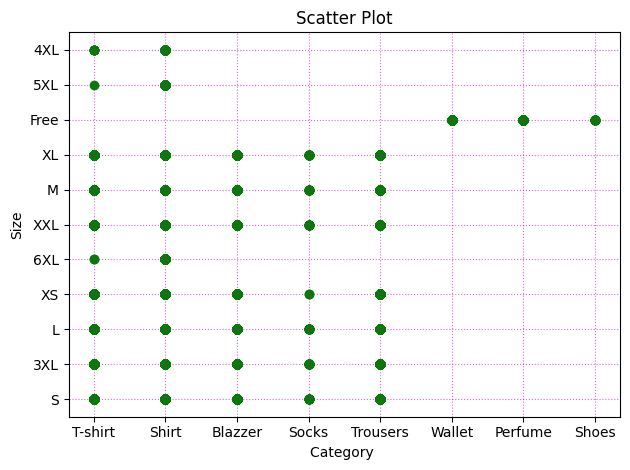

In [109]:
# Prepare data for scatter plot
x_data = df['Category']  
y_data = df['Size'] 

# Plot the scatter plot
plt.scatter(x_data, y_data, marker = "o", c = "g")
plt.xlabel('Category ')  
plt.ylabel('Size')  
plt.title('Scatter Plot') 
plt.grid(c = "m", ls = ":",alpha = 0.6)
plt.tight_layout() # Adjust layout to prevent clipping
plt.show()

## Conclusion

The data analysis reveals that the business has a significant customer base in Maharashtra state, 
mainly serves retailers, fulfills orders through Amazon, 
experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.